<a href="https://colab.research.google.com/github/gidzinskikcl/OmiGrow/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
metadata_df = pd.read_csv("yeast5k_metadata.csv")
# filter metadata to keep only true KOs
ko_meta = metadata_df[metadata_df["sampletype"] == "ko"].copy()
ko_meta

,Filename,Injection nr,Well nr (counted row-wise),Plate (batch) nr,sampletype,ORF
56,10_9_hpr1_ko_YAL059W_ECM1_0.47,10,9,hpr1,ko,YAL059W
57,10_9_hpr10_ko_YBR174C_YBR174c_0.23,10,9,hpr10,ko,YBR174C
58,10_9_hpr11_ko_YDR078C_SHU2_0.36,10,9,hpr11,ko,YDR078C
59,10_9_hpr12_ko_YDR389W_SAC7_0.16,10,9,hpr12,ko,YDR389W
60,10_9_hpr14_ko_YHR048W_YHK8_0.40,10,9,hpr14,ko,YHR048W
...,...,...,...,...,...,...
5471,99_92_hpr6_ko_YOR083W_WHI5_-0.15,99,92,hpr6,ko,YOR083W
5472,99_92_hpr7_ko_YOL013C_HRD1_0.68,99,92,hpr7,ko,YOL013C
5473,99_92_hpr8_ko_YPL229W_YPL229w_0.53,99,92,hpr8,ko,YPL229W
5474,99_92_hpr9_ko_YPL106C_SSE1_0.31,99,92,hpr9,ko,YPL106C


In [3]:
df = pd.read_csv("yeast5k_impute_wide.csv")
df

,Protein.Group,1_0_hpr1_qc_qc_qc.1_NA,1_0_hpr10_qc_qc_qc.1_NA,1_0_hpr11_qc_qc_qc.1_NA,1_0_hpr12_qc_qc_qc.1_NA,1_0_hpr13_qc_qc_qc.1_NA,1_0_hpr14_qc_qc_qc.1_NA,1_0_hpr15_qc_qc_qc.1_NA,1_0_hpr16_qc_qc_qc.1_NA,1_0_hpr17_qc_qc_qc.1_NA,...,99_92_hpr51_ko_YER122C_GLO3_0.08,99_92_hpr52_ko_YKL068W-A_YKL068w-a_0.53,99_92_hpr56_ko_YDR204W_521_0.31,99_92_hpr57_ko_YDL146W_1471_0.44,99_92_hpr58_ko_YNL055C_POR1_0.34,99_92_hpr6_ko_YOR083W_WHI5_-0.15,99_92_hpr7_ko_YOL013C_HRD1_0.68,99_92_hpr8_ko_YPL229W_YPL229w_0.53,99_92_hpr9_ko_YPL106C_SSE1_0.31,99_93_hpr41_ko_YML076C_WAR1_NA
0,A5Z2X5,382.500590,358.011883,425.003496,362.810221,343.239397,338.658473,409.446579,382.500590,302.788190,...,50.665277,422.379066,340.276427,272.218898,357.891512,359.541435,380.625998,349.122398,479.337270,321.488846
1,D6VTK4,130.878325,115.209987,123.839633,119.663381,123.839633,155.358229,139.631793,109.704071,120.026158,...,114.176979,129.389863,152.110446,205.758432,119.727178,108.986970,110.458681,123.241353,161.057275,147.043264
2,O13297,107.559384,119.452095,112.661779,118.129600,114.507618,121.020011,115.785339,106.362571,129.769206,...,84.173547,119.140363,130.121718,115.919420,139.842155,116.448585,118.730800,115.871459,105.670537,111.880159
3,O13516,71.998038,1.926275,5.994694,64.971228,68.533906,91.408692,57.514214,62.710024,67.741408,...,63.621191,28.109404,74.331378,66.194316,96.257930,90.058839,80.156864,62.892791,67.773234,56.779478
4,O13563,412.574972,413.622583,371.617726,385.354541,443.978580,491.366517,395.804377,372.860733,426.039216,...,456.363847,394.411062,399.104634,454.619551,444.729576,443.474892,460.739364,456.569267,371.184829,398.737432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,Q99312,132.778169,130.309600,128.167092,141.366910,129.559615,138.061585,149.356454,114.855325,122.904143,...,116.791103,151.743044,150.643920,129.359680,158.386507,130.275624,132.137587,136.690568,126.498816,144.871787
1846,Q99321,150.396975,133.375771,162.499931,150.327713,173.579038,156.806730,133.732380,152.071353,143.596505,...,126.262462,125.762560,152.610560,160.532502,132.779151,155.891398,133.799898,147.811864,130.568456,144.853726
1847,Q99383,295.449733,312.858991,287.510821,303.671935,268.382377,293.885912,312.015515,277.487181,305.536463,...,297.559677,271.182863,273.522513,263.085690,303.334422,345.549072,288.843031,300.931992,268.540182,296.470271
1848,Q99394,98.716976,116.346432,70.270913,73.088114,83.771117,136.439804,90.544685,62.793355,72.639844,...,74.164517,68.409453,58.444772,61.422058,76.668688,78.463142,75.853897,71.288494,60.039178,81.938235


In [4]:
ko_filenames = ko_meta["Filename"].tolist()

# Always keep the 'Protein.Group' column
proteomics_ko = df[["Protein.Group"] + ko_filenames].copy()
proteomics_ko

,Protein.Group,10_9_hpr1_ko_YAL059W_ECM1_0.47,10_9_hpr10_ko_YBR174C_YBR174c_0.23,10_9_hpr11_ko_YDR078C_SHU2_0.36,10_9_hpr12_ko_YDR389W_SAC7_0.16,10_9_hpr14_ko_YHR048W_YHK8_0.40,10_9_hpr15_ko_YHR046C_INM1_0.53,10_9_hpr16_ko_YHR207C_SET5_0.05,10_9_hpr17_ko_YLR169W_YLR169w_0.52,10_9_hpr18_ko_YKL071W_YKL071w_0.47,...,99_92_hpr51_ko_YER122C_GLO3_0.08,99_92_hpr52_ko_YKL068W-A_YKL068w-a_0.53,99_92_hpr56_ko_YDR204W_521_0.31,99_92_hpr57_ko_YDL146W_1471_0.44,99_92_hpr58_ko_YNL055C_POR1_0.34,99_92_hpr6_ko_YOR083W_WHI5_-0.15,99_92_hpr7_ko_YOL013C_HRD1_0.68,99_92_hpr8_ko_YPL229W_YPL229w_0.53,99_92_hpr9_ko_YPL106C_SSE1_0.31,99_93_hpr41_ko_YML076C_WAR1_NA
0,A5Z2X5,502.787723,417.649091,271.738079,303.719580,447.300686,449.542435,369.179046,426.692525,270.036982,...,50.665277,422.379066,340.276427,272.218898,357.891512,359.541435,380.625998,349.122398,479.337270,321.488846
1,D6VTK4,139.214913,110.891151,146.341773,130.991534,117.561966,150.301596,104.954013,129.704131,147.105602,...,114.176979,129.389863,152.110446,205.758432,119.727178,108.986970,110.458681,123.241353,161.057275,147.043264
2,O13297,102.877816,97.852190,125.117918,129.445458,141.765746,117.524723,94.291255,139.784515,126.787116,...,84.173547,119.140363,130.121718,115.919420,139.842155,116.448585,118.730800,115.871459,105.670537,111.880159
3,O13516,49.673212,31.104779,46.334842,64.140759,47.184335,65.059774,64.896399,65.370470,72.409374,...,63.621191,28.109404,74.331378,66.194316,96.257930,90.058839,80.156864,62.892791,67.773234,56.779478
4,O13563,444.157103,360.270197,409.926392,477.807067,347.267010,509.786304,389.399556,474.311284,538.225253,...,456.363847,394.411062,399.104634,454.619551,444.729576,443.474892,460.739364,456.569267,371.184829,398.737432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,Q99312,129.991229,145.912004,118.649676,103.678188,151.034313,119.331397,144.211479,152.022080,140.160732,...,116.791103,151.743044,150.643920,129.359680,158.386507,130.275624,132.137587,136.690568,126.498816,144.871787
1846,Q99321,183.940955,182.381955,163.376300,199.292570,223.854498,154.168367,194.941126,152.277164,177.112861,...,126.262462,125.762560,152.610560,160.532502,132.779151,155.891398,133.799898,147.811864,130.568456,144.853726
1847,Q99383,299.653626,299.891523,285.671462,325.914321,347.792910,318.498614,299.742497,313.934175,339.675636,...,297.559677,271.182863,273.522513,263.085690,303.334422,345.549072,288.843031,300.931992,268.540182,296.470271
1848,Q99394,60.177184,31.577961,61.669233,70.151266,80.940975,63.083535,65.794179,68.744049,102.570098,...,74.164517,68.409453,58.444772,61.422058,76.668688,78.463142,75.853897,71.288494,60.039178,81.938235


In [5]:
# map filename → ORF
filename_to_orf = dict(zip(ko_meta["Filename"], ko_meta["ORF"]))

In [6]:
growth = pd.read_csv("yeast5k_growthrates_byORF.csv")
growth

,orf,SC,SM,YPD
0,YAL002W,0.791282,0.681632,0.870800
1,YAL004W,0.993729,0.942035,0.988948
2,YAL005C,0.981361,0.999968,0.966565
3,YAL007C,0.903937,0.934153,0.960802
4,YAL008W,0.984432,0.998076,1.001219
...,...,...,...,...
4545,YPR197C,0.982672,0.983925,1.014877
4546,YPR198W,0.968507,0.989911,1.013429
4547,YPR199C,0.956514,0.978501,1.029409
4548,YPR200C,0.967383,0.952433,1.002062


In [7]:
growth_sm = growth[["orf", "SM"]].copy()
growth_sm = growth_sm.rename(columns={"orf": "ORF"})

In [8]:
ko_meta = ko_meta.merge(growth_sm, on="ORF", how="left")
ko_meta

,Filename,Injection nr,Well nr (counted row-wise),Plate (batch) nr,sampletype,ORF,SM
0,10_9_hpr1_ko_YAL059W_ECM1_0.47,10,9,hpr1,ko,YAL059W,0.949037
1,10_9_hpr10_ko_YBR174C_YBR174c_0.23,10,9,hpr10,ko,YBR174C,0.846905
2,10_9_hpr11_ko_YDR078C_SHU2_0.36,10,9,hpr11,ko,YDR078C,0.795139
3,10_9_hpr12_ko_YDR389W_SAC7_0.16,10,9,hpr12,ko,YDR389W,0.747030
4,10_9_hpr14_ko_YHR048W_YHK8_0.40,10,9,hpr14,ko,YHR048W,1.026152
...,...,...,...,...,...,...,...
4694,99_92_hpr6_ko_YOR083W_WHI5_-0.15,99,92,hpr6,ko,YOR083W,0.812612
4695,99_92_hpr7_ko_YOL013C_HRD1_0.68,99,92,hpr7,ko,YOL013C,0.961501
4696,99_92_hpr8_ko_YPL229W_YPL229w_0.53,99,92,hpr8,ko,YPL229W,0.957038
4697,99_92_hpr9_ko_YPL106C_SSE1_0.31,99,92,hpr9,ko,YPL106C,0.667101


In [9]:
ko_meta = ko_meta.dropna(subset=["SM"])
ko_meta

,Filename,Injection nr,Well nr (counted row-wise),Plate (batch) nr,sampletype,ORF,SM
0,10_9_hpr1_ko_YAL059W_ECM1_0.47,10,9,hpr1,ko,YAL059W,0.949037
1,10_9_hpr10_ko_YBR174C_YBR174c_0.23,10,9,hpr10,ko,YBR174C,0.846905
2,10_9_hpr11_ko_YDR078C_SHU2_0.36,10,9,hpr11,ko,YDR078C,0.795139
3,10_9_hpr12_ko_YDR389W_SAC7_0.16,10,9,hpr12,ko,YDR389W,0.747030
4,10_9_hpr14_ko_YHR048W_YHK8_0.40,10,9,hpr14,ko,YHR048W,1.026152
...,...,...,...,...,...,...,...
4694,99_92_hpr6_ko_YOR083W_WHI5_-0.15,99,92,hpr6,ko,YOR083W,0.812612
4695,99_92_hpr7_ko_YOL013C_HRD1_0.68,99,92,hpr7,ko,YOL013C,0.961501
4696,99_92_hpr8_ko_YPL229W_YPL229w_0.53,99,92,hpr8,ko,YPL229W,0.957038
4697,99_92_hpr9_ko_YPL106C_SSE1_0.31,99,92,hpr9,ko,YPL106C,0.667101


In [10]:
valid_files = ko_meta["Filename"].tolist()
proteomics_ko = proteomics_ko[["Protein.Group"] + valid_files]

In [11]:
# drop protein ID column and transpose
X = proteomics_ko.set_index("Protein.Group").T

# Now rows = samples, columns = proteins

In [12]:
X

Protein.Group,A5Z2X5,D6VTK4,O13297,O13516,O13563,O14455,O14467,O43137,O74700,P00128,...,Q99258,Q99260,Q99278,Q99287,Q99297,Q99312,Q99321,Q99383,Q99394,Q9P305
10_9_hpr1_ko_YAL059W_ECM1_0.47,502.787723,139.214913,102.877816,49.673212,444.157103,851.269629,1260.975085,1998.568801,192.365104,705.791948,...,646.376007,190.085112,101.184235,93.697144,166.241754,129.991229,183.940955,299.653626,60.177184,238.791918
10_9_hpr10_ko_YBR174C_YBR174c_0.23,417.649091,110.891151,97.852190,31.104779,360.270197,794.125957,1217.785601,1443.972541,208.073987,478.956568,...,413.245001,216.799556,53.551184,89.669663,129.279778,145.912004,182.381955,299.891523,31.577961,203.705870
10_9_hpr11_ko_YDR078C_SHU2_0.36,271.738079,146.341773,125.117918,46.334842,409.926392,673.549913,1299.928799,2020.084987,277.008538,408.080106,...,737.910225,261.372662,132.663714,100.548206,100.561251,118.649676,163.376300,285.671462,61.669233,265.456145
10_9_hpr12_ko_YDR389W_SAC7_0.16,303.719580,130.991534,129.445458,64.140759,477.807067,681.396501,1317.107177,1428.508710,191.453301,491.255375,...,755.983174,243.591410,75.800159,104.848816,147.126456,103.678188,199.292570,325.914321,70.151266,205.792592
10_9_hpr14_ko_YHR048W_YHK8_0.40,447.300686,117.561966,141.765746,47.184335,347.267010,698.645851,1410.499804,2201.814558,163.099331,519.621990,...,591.257928,252.473200,43.583173,108.209418,128.598614,151.034313,223.854498,347.792910,80.940975,239.332775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99_92_hpr6_ko_YOR083W_WHI5_-0.15,359.541435,108.986970,116.448585,90.058839,443.474892,790.804404,1333.146762,1076.910982,218.970870,394.741763,...,600.011651,240.723073,69.652292,104.705719,159.639257,130.275624,155.891398,345.549072,78.463142,220.050373
99_92_hpr7_ko_YOL013C_HRD1_0.68,380.625998,110.458681,118.730800,80.156864,460.739364,894.945574,1386.398987,1497.450906,170.314866,499.174306,...,519.174103,252.195238,69.531590,105.949887,187.423460,132.137587,133.799898,288.843031,75.853897,204.067215
99_92_hpr8_ko_YPL229W_YPL229w_0.53,349.122398,123.241353,115.871459,62.892791,456.569267,879.733986,1307.823524,1497.084150,207.076191,469.378513,...,592.606714,236.110208,60.902727,107.462608,172.514252,136.690568,147.811864,300.931992,71.288494,214.319144
99_92_hpr9_ko_YPL106C_SSE1_0.31,479.337270,161.057275,105.670537,67.773234,371.184829,825.592164,1735.809522,1696.161420,182.994418,549.332984,...,485.660675,213.223377,64.990381,86.425869,116.859956,126.498816,130.568456,268.540182,60.039178,195.777134


In [13]:
# reorder ko_meta to match X.index
ko_meta = ko_meta.set_index("Filename").loc[X.index]
y = ko_meta["SM"]   # growth target

In [14]:
y

,SM
10_9_hpr1_ko_YAL059W_ECM1_0.47,0.949037
10_9_hpr10_ko_YBR174C_YBR174c_0.23,0.846905
10_9_hpr11_ko_YDR078C_SHU2_0.36,0.795139
10_9_hpr12_ko_YDR389W_SAC7_0.16,0.747030
10_9_hpr14_ko_YHR048W_YHK8_0.40,1.026152
...,...
99_92_hpr6_ko_YOR083W_WHI5_-0.15,0.812612
99_92_hpr7_ko_YOL013C_HRD1_0.68,0.961501
99_92_hpr8_ko_YPL229W_YPL229w_0.53,0.957038
99_92_hpr9_ko_YPL106C_SSE1_0.31,0.667101


In [15]:
tf_df = pd.read_csv("full_data.csv")
tf_df

,Row,log2relT,r_0001,r_0002,r_0003,r_0004,r_0005,r_0006,r_0007,r_0012,...,YOL154W,YMR243C,YNR039C,YER033C,YGL255W,YLR130C,YKL175W,YBR046C,YGR285C,YNL241C
0,SPO7,0.117926,0,0,0,0,2.473030,2.473030,0.144485,0,...,1.017900,0.986438,1.046010,0.924151,1.218410,1.088020,1.045430,1.011500,1.019530,0.854824
1,SWC3,0.126712,0,0,0,0,2.098189,2.098189,0.122585,0,...,0.872733,1.059420,1.100080,0.885240,0.855087,0.942752,1.015670,0.924718,0.956686,1.079170
2,DEP1,0.218045,0,0,0,0,1.940601,1.940601,0.113378,0,...,1.230960,1.083000,1.033210,1.187760,1.864690,1.069910,1.330570,2.317200,1.061820,1.082650
3,NTG1,0.132121,0,0,0,0,2.529573,2.529573,0.147789,0,...,1.012910,0.946434,1.055250,1.097320,1.043160,1.031630,1.015030,0.960894,1.054940,0.987724
4,FUN30,0.039034,0,0,0,0,2.352733,2.352733,0.137457,0,...,1.000300,0.867124,1.058130,0.980957,0.928552,1.056380,1.027020,0.943752,0.978574,1.092070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,VPS4,0.197573,0,0,0,0,2.302164,2.302164,0.134503,0,...,1.016810,0.899452,0.924370,1.203080,0.568853,0.643403,0.993526,1.136030,0.957800,0.931497
1139,YPR174C,0.046997,0,0,0,0,2.591253,2.591253,0.151392,0,...,0.972925,1.021150,0.951780,1.024560,1.384820,1.099840,1.015370,1.107730,0.989863,1.076310
1140,HDA3,0.020369,0,0,0,0,2.438875,2.438875,0.142490,0,...,1.335710,0.998218,1.072960,1.365250,2.343610,0.793814,0.959690,0.871067,1.038370,0.937031
1141,SKI3,0.077265,0,0,0,0,2.225209,2.225209,0.130006,0,...,1.016790,1.095950,0.966158,0.841791,1.081710,1.120820,0.982711,1.074530,0.986773,1.011620


In [16]:
t0_df = pd.read_csv("t_data.csv")
t0_df

,log2relT,YMR056C,YBR085W,YJR155W,YNL331C,YOL165C,YCR107W,YDL243C,YFL056C,YNL141W,...,YOL154W,YMR243C,YNR039C,YER033C,YGL255W,YLR130C,YKL175W,YBR046C,YGR285C,YNL241C
0,0.117926,0.873936,1.123420,1.219760,1.010240,1.065550,1.041020,0.984730,0.986301,1.034690,...,1.017900,0.986438,1.046010,0.924151,1.218410,1.088020,1.045430,1.011500,1.019530,0.854824
1,0.126712,0.969522,0.898534,0.816353,0.954726,0.700370,0.655766,0.909747,0.976345,0.926949,...,0.872733,1.059420,1.100080,0.885240,0.855087,0.942752,1.015670,0.924718,0.956686,1.079170
2,0.218045,0.912138,2.232280,0.591941,0.825880,0.789221,0.780301,0.758667,0.749384,1.003050,...,1.230960,1.083000,1.033210,1.187760,1.864690,1.069910,1.330570,2.317200,1.061820,1.082650
3,0.132121,1.021890,1.071560,1.040100,1.045370,1.050360,0.984138,1.061520,0.953190,1.002070,...,1.012910,0.946434,1.055250,1.097320,1.043160,1.031630,1.015030,0.960894,1.054940,0.987724
4,0.039034,0.989634,0.902821,1.020390,1.018130,1.046720,1.026900,1.060540,1.100950,0.964210,...,1.000300,0.867124,1.058130,0.980957,0.928552,1.056380,1.027020,0.943752,0.978574,1.092070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.197573,1.041870,1.162900,0.940750,0.999960,1.039000,1.063910,0.957131,0.942769,0.930264,...,1.016810,0.899452,0.924370,1.203080,0.568853,0.643403,0.993526,1.136030,0.957800,0.931497
1139,0.046997,0.961794,0.996471,0.783932,0.934457,0.922167,0.923574,0.921911,0.903314,0.941348,...,0.972925,1.021150,0.951780,1.024560,1.384820,1.099840,1.015370,1.107730,0.989863,1.076310
1140,0.020369,0.998772,1.636330,0.940783,1.078440,0.983968,0.978083,1.048250,0.948486,1.026160,...,1.335710,0.998218,1.072960,1.365250,2.343610,0.793814,0.959690,0.871067,1.038370,0.937031
1141,0.077265,0.827729,1.428920,1.081270,1.149490,1.112110,1.193930,1.154620,1.144180,0.910279,...,1.016790,1.095950,0.966158,0.841791,1.081710,1.120820,0.982711,1.074530,0.986773,1.011620


In [17]:
f_df = tf_df.drop(columns=t0_df.columns.values)
f1_df = f_df.drop(columns="Row")
t_df = tf_df.drop(columns=f1_df.columns.values)
t_df


,Row,log2relT,YMR056C,YBR085W,YJR155W,YNL331C,YOL165C,YCR107W,YDL243C,YFL056C,...,YOL154W,YMR243C,YNR039C,YER033C,YGL255W,YLR130C,YKL175W,YBR046C,YGR285C,YNL241C
0,SPO7,0.117926,0.873936,1.123420,1.219760,1.010240,1.065550,1.041020,0.984730,0.986301,...,1.017900,0.986438,1.046010,0.924151,1.218410,1.088020,1.045430,1.011500,1.019530,0.854824
1,SWC3,0.126712,0.969522,0.898534,0.816353,0.954726,0.700370,0.655766,0.909747,0.976345,...,0.872733,1.059420,1.100080,0.885240,0.855087,0.942752,1.015670,0.924718,0.956686,1.079170
2,DEP1,0.218045,0.912138,2.232280,0.591941,0.825880,0.789221,0.780301,0.758667,0.749384,...,1.230960,1.083000,1.033210,1.187760,1.864690,1.069910,1.330570,2.317200,1.061820,1.082650
3,NTG1,0.132121,1.021890,1.071560,1.040100,1.045370,1.050360,0.984138,1.061520,0.953190,...,1.012910,0.946434,1.055250,1.097320,1.043160,1.031630,1.015030,0.960894,1.054940,0.987724
4,FUN30,0.039034,0.989634,0.902821,1.020390,1.018130,1.046720,1.026900,1.060540,1.100950,...,1.000300,0.867124,1.058130,0.980957,0.928552,1.056380,1.027020,0.943752,0.978574,1.092070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,VPS4,0.197573,1.041870,1.162900,0.940750,0.999960,1.039000,1.063910,0.957131,0.942769,...,1.016810,0.899452,0.924370,1.203080,0.568853,0.643403,0.993526,1.136030,0.957800,0.931497
1139,YPR174C,0.046997,0.961794,0.996471,0.783932,0.934457,0.922167,0.923574,0.921911,0.903314,...,0.972925,1.021150,0.951780,1.024560,1.384820,1.099840,1.015370,1.107730,0.989863,1.076310
1140,HDA3,0.020369,0.998772,1.636330,0.940783,1.078440,0.983968,0.978083,1.048250,0.948486,...,1.335710,0.998218,1.072960,1.365250,2.343610,0.793814,0.959690,0.871067,1.038370,0.937031
1141,SKI3,0.077265,0.827729,1.428920,1.081270,1.149490,1.112110,1.193930,1.154620,1.144180,...,1.016790,1.095950,0.966158,0.841791,1.081710,1.120820,0.982711,1.074530,0.986773,1.011620


In [18]:
import numpy as np

prot_df = X

# prot_df: rows = samples, cols = proteins
# transcript_df: rows = KOs, first col = KO name (e.g. 'Row'), rest = expression

# turn index into Series so we can parse it
sample_ids = prot_df.index.to_series()

# split on '_' and take second-from-last token as gene name (ECM1 in example)
prot_gene_names = sample_ids.str.split('_').str[-2]
prot_gene_names.name = "gene"

# build an annotation table for proteomics samples: sample_id -> gene
prot_annot = pd.DataFrame({
    "sample_id": sample_ids,
    "gene": prot_gene_names
}).set_index("sample_id")


In [19]:
transcript_df = t_df
# if first column has a different name, adjust here
ko_col_name = transcript_df.columns[0]   # likely 'Row'
transcript_kos = transcript_df[ko_col_name]

In [20]:
common_genes = np.intersect1d(
    prot_annot["gene"].unique(),
    transcript_kos.unique()
)

len(common_genes)  # how many overlapping KOs

965

In [21]:
# keep only proteomics samples whose gene is in the intersection
prot_common = prot_df.loc[prot_annot["gene"].isin(common_genes)].copy()

# add gene column so we can group
prot_common["gene"] = prot_annot.loc[prot_common.index, "gene"]

# aggregate replicates per gene by mean (you can also use median)
prot_by_gene = prot_common.groupby("gene").mean()

In [22]:
# keep only rows whose KO is in the intersection
transcript_common = transcript_df[transcript_df[ko_col_name].isin(common_genes)].copy()

# set KO gene as index and drop the label column
transcript_by_gene = transcript_common.set_index(ko_col_name)

In [23]:
# ensure both have exactly the same genes, same order
common_genes_sorted = np.sort(common_genes)

prot_final = prot_by_gene.loc[common_genes_sorted]
transcript_final = transcript_by_gene.loc[common_genes_sorted]

In [24]:
prot_final

Protein.Group,A5Z2X5,D6VTK4,O13297,O13516,O13563,O14455,O14467,O43137,O74700,P00128,...,Q99258,Q99260,Q99278,Q99287,Q99297,Q99312,Q99321,Q99383,Q99394,Q9P305
gene,,,,,,,,,,,,,,,,,,,,,
ABF2,192.891025,166.624204,98.721387,66.294618,373.508170,882.117929,1495.517864,1130.204000,223.450655,57.674680,...,672.482024,227.545249,69.317735,90.155287,141.131707,140.973619,168.850807,276.279086,73.956099,224.879641
ACA1,352.615800,116.886260,112.241112,62.796519,393.807919,764.169916,1293.242080,1433.131339,186.886571,485.529726,...,599.436465,226.766166,72.289104,91.569805,146.517089,152.843632,152.185995,307.266761,57.878660,240.870288
ACE2,330.400153,124.831371,99.620382,67.051989,461.930093,758.719158,1323.915237,1901.931119,185.512319,537.630396,...,655.094522,242.954211,66.638972,88.975787,171.798278,121.188597,150.463441,292.407902,49.933318,244.130692
ACM1,347.199517,149.073289,112.483217,66.409726,393.383198,756.158804,1288.942164,1699.569293,187.803193,444.062948,...,569.553583,241.513983,93.444631,104.930166,135.952896,108.554713,144.995976,289.763760,62.024000,161.871984
ACO1,270.612270,109.685002,97.569596,53.736088,409.325361,674.746684,1309.939432,1762.682240,211.539917,464.341502,...,615.701239,238.306210,64.421707,96.590366,159.608204,127.446121,151.563731,303.661917,52.504313,228.933387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUH1,492.601953,40.856478,1.230622,52.112828,349.246697,572.754183,940.682153,1626.646572,221.250924,652.640211,...,559.624242,153.376300,85.988044,110.157862,113.056872,47.453578,206.559132,373.829820,0.012495,121.235521
YVH1,431.823753,143.051180,122.791984,61.152235,378.953348,822.939521,1391.254715,1591.893315,169.271690,472.221897,...,560.547022,236.996400,53.142603,97.755324,169.430966,118.131002,165.511108,274.022183,55.168368,169.131615
ZDS1,325.743295,72.755547,113.948177,66.848369,414.918887,769.155099,1234.504550,1541.652866,190.113657,544.306564,...,595.451182,201.929122,65.609892,110.660356,156.581139,129.985675,161.849566,302.963207,72.700578,247.657084


In [25]:
transcript_final

,log2relT,YMR056C,YBR085W,YJR155W,YNL331C,YOL165C,YCR107W,YDL243C,YFL056C,YNL141W,...,YOL154W,YMR243C,YNR039C,YER033C,YGL255W,YLR130C,YKL175W,YBR046C,YGR285C,YNL241C
Row,,,,,,,,,,,,,,,,,,,,,
ABF2,0.014355,0.817034,1.059350,0.787720,0.993197,1.075880,1.076530,0.976596,0.916248,0.973024,...,1.021670,0.914827,1.023980,1.062590,1.194040,0.957810,1.011170,1.052640,1.004090,0.933113
ACA1,0.033277,1.003980,0.965611,1.003450,0.981118,1.041850,1.051670,1.023540,1.045110,1.131530,...,1.048760,0.962557,1.111560,1.017560,1.369270,1.083460,1.014100,0.900296,0.959996,0.957160
ACE2,-0.019306,0.929031,0.839442,1.119980,1.025870,0.992597,0.947095,1.032010,1.005650,0.983014,...,1.122960,0.900483,1.041940,0.952759,4.478230,1.314760,1.033890,1.067330,0.955567,0.937007
ACM1,0.096537,1.141390,0.859567,1.078870,0.928758,0.819778,0.791966,0.899051,0.891796,0.962257,...,1.063020,0.975237,0.999465,1.196600,0.763619,0.886077,0.978669,1.084660,1.052620,0.971424
ACO1,1.410520,1.246700,1.211640,0.760663,1.148420,1.216710,1.288310,1.084000,1.002750,0.602678,...,1.123330,0.752013,0.935011,1.286500,1.037140,0.684523,1.389080,1.852990,0.948616,1.498440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUH1,0.036994,1.072880,0.891948,0.936787,0.964699,1.016820,1.058540,0.949418,0.907240,1.009530,...,1.053720,0.982911,0.990890,1.003490,0.830930,0.915192,0.977393,1.048880,1.043050,1.069320
YVH1,0.937000,1.121430,0.475268,1.869990,1.192790,1.226030,1.173140,1.253860,1.500030,0.969550,...,1.079190,0.773876,1.029630,0.962086,0.451750,1.131940,0.850507,0.862357,1.007110,0.937387
ZDS1,0.030000,0.969405,0.871189,0.953113,1.031590,1.161320,1.123140,1.011010,0.977367,1.231100,...,0.972682,1.024180,1.057980,0.828343,1.361060,0.952715,1.073880,0.889288,1.026940,0.867977


In [26]:
growth_df = y.to_frame(name="SM").copy()      # index = sample_id
growth_df["gene"] = prot_annot.loc[growth_df.index, "gene"]

In [27]:
growth_by_gene = growth_df.groupby("gene")["SM"].mean()

In [28]:
# keep only genes present in both
common_genes_final = prot_final.index.intersection(growth_by_gene.index)

prot_final_aligned = prot_final.loc[common_genes_final]
y_final = growth_by_gene.loc[common_genes_final]

In [29]:
y_final

,SM
gene,
ABF2,0.840217
ACA1,1.030655
ACE2,1.163184
ACM1,0.962418
ACO1,1.003542
...,...
YUH1,0.875211
YVH1,0.740005
ZDS1,0.978848


Number of common genes: 965
Pearson correlation (growth proxy vs Messner):
  r = 0.503, p = 3.942e-63
Spearman correlation (growth proxy vs Messner):
  ρ = 0.379, p = 2.558e-34


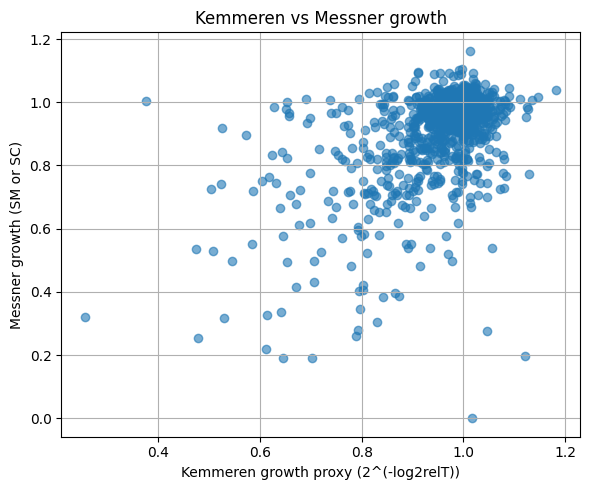

In [39]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

# 1. Extract Kemmeren growth from SC table
# df_sc is a Series: index = gene, values = log2relT
df_sc = transcript_final["log2relT"]          # Series
kemmeren_log2relT = df_sc                    # just use it directly

# 2. Extract Messner growth from SM (or SC) table
df_sm = y_final

if isinstance(df_sm, pd.DataFrame):
    messner_growth = df_sm.iloc[:, 0]        # first (and only) column
else:
    messner_growth = df_sm                   # already a Series

messner_growth.name = "Messner_growth"

# 3. Keep only genes present in BOTH datasets
common_genes = kemmeren_log2relT.index.intersection(messner_growth.index)

kemmeren_log2relT_common = kemmeren_log2relT.loc[common_genes]
messner_growth_common    = messner_growth.loc[common_genes]

print(f"Number of common genes: {len(common_genes)}")

# 4. Convert Kemmeren doubling-time ratio (log2relT) to a growth-rate proxy
# relDT = 2**log2relT, so growth ∝ 1/relDT = 2**(-log2relT)
kemmeren_growth_proxy = 2 ** (-kemmeren_log2relT_common)
kemmeren_growth_proxy.name = "Kemmeren_growth_proxy"

# 5. Compute correlations
pearson_r, pearson_p = pearsonr(kemmeren_growth_proxy, messner_growth_common)
spearman_r, spearman_p = spearmanr(kemmeren_growth_proxy, messner_growth_common)

print("Pearson correlation (growth proxy vs Messner):")
print(f"  r = {pearson_r:.3f}, p = {pearson_p:.3e}")

print("Spearman correlation (growth proxy vs Messner):")
print(f"  ρ = {spearman_r:.3f}, p = {spearman_p:.3e}")

# 6. Scatter plot for visual inspection
plt.figure(figsize=(6, 5))
plt.scatter(kemmeren_growth_proxy, messner_growth_common, alpha=0.6)
plt.xlabel("Kemmeren growth proxy (2^(-log2relT))")
plt.ylabel("Messner growth (SM or SC)")
plt.title("Kemmeren vs Messner growth")
plt.grid(True)
plt.tight_layout()
plt.show()


Top mutants with strongest disagreement (Messner - Kemmeren):

      Gene  Kemmeren_growth  Messner_growth  Difference
RGT1  RGT1         1.016502        0.000000   -1.016502
LOC1  LOC1         1.121803        0.198215   -0.923588
AFT1  AFT1         1.046585        0.275120   -0.771465
ACO1  ACO1         0.376176        1.003542    0.627366
DHH1  DHH1         0.789494        0.259582   -0.529912
LSM1  LSM1         0.828979        0.304719   -0.524260
LEU3  LEU3         1.056939        0.539324   -0.517615
DUN1  DUN1         0.791686        0.280556   -0.511130
GCN5  GCN5         0.702709        0.191870   -0.510839
HTL1  HTL1         0.873236        0.386806   -0.486430


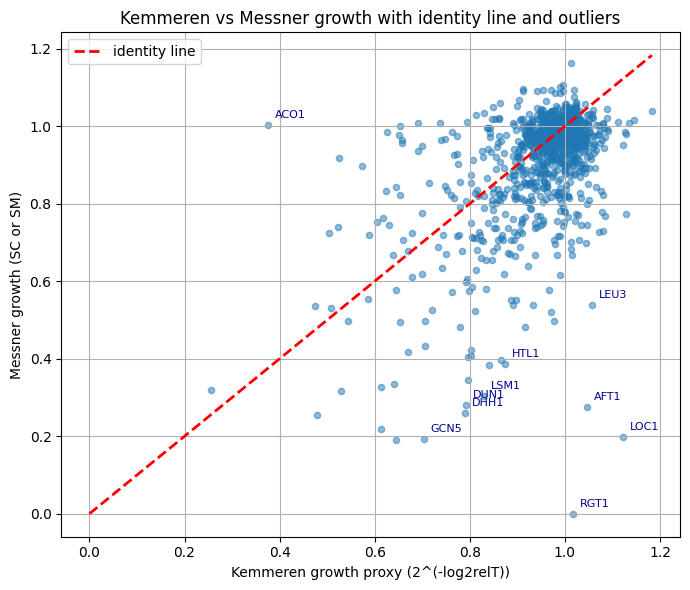

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Prepare values
x = kemmeren_growth_proxy        # Kemmeren growth proxy (higher = faster)
y = messner_growth_common        # Messner growth rate
genes = x.index                  # gene names

# -------- OUTLIERS BY ABSOLUTE DIFFERENCE -------- #
diff = y - x                     # difference in growth measures
abs_diff = diff.abs()

# Choose how many outliers to annotate
N_OUTLIERS = 10

top_outliers = abs_diff.nlargest(N_OUTLIERS)
print("Top mutants with strongest disagreement (Messner - Kemmeren):\n")
print(pd.DataFrame({
    "Gene": top_outliers.index,
    "Kemmeren_growth": x.loc[top_outliers.index],
    "Messner_growth": y.loc[top_outliers.index],
    "Difference": diff.loc[top_outliers.index]
}))

# -------- PLOT -------- #
plt.figure(figsize=(7, 6))
plt.scatter(x, y, alpha=0.5, s=20)

# Identity line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='identity line')

# Annotate top outliers
for gene in top_outliers.index:
    plt.annotate(
        gene,
        xy=(x.loc[gene], y.loc[gene]),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8,
        color='darkblue'
    )

plt.xlabel('Kemmeren growth proxy (2^(-log2relT))')
plt.ylabel('Messner growth (SC or SM)')
plt.title('Kemmeren vs Messner growth with identity line and outliers')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [41]:
# === TRANSCRIPTOMICS (SC) ===
# Expression only (remove log2relT)
transcriptomics = transcript_final.drop(columns=["log2relT"])
transcriptomics.index.name = "KO"

# Growth only (Kemmeren)
transcriptomics_growth = kemmeren_log2relT.to_frame(name="growth")
transcriptomics_growth.index.name = "KO"

# Save
transcriptomics.to_csv("transcriptomics.csv")
transcriptomics_growth.to_csv("transcriptomics_growth.csv")

print("Saved transcriptomics and transcriptomics growth.")

Saved transcriptomics and transcriptomics growth.


In [42]:
# === PROTEOMICS (SM) ===
# proteomics_final must be your proteome matrix with KO as index
proteomics = prot_final.copy()
proteomics.index.name = "KO"

# Growth only (Messner)
proteomics_growth = messner_growth_common.to_frame(name="growth")
proteomics_growth.index.name = "KO"

# Save
proteomics.to_csv("proteomics.csv")
proteomics_growth.to_csv("proteomics_growth.csv")

print("Saved proteomics and proteomics growth.")


Saved proteomics and proteomics growth.
